# Image Processing Module 6: The Power of Thresholds pt. 2

### Purpose: To introduce more advanced Thresholding techniques and binarization

Created by: Hawley Helmbrecht

Creation Date: 08/13/2020

Last Update: 

*Step 1: Import Necessary Packages*

By now you should be pretty familiar with a few of our imports. They are great packages that are used pretty universally within scientific data science! Be proud of yourself for recognizing and knowing these packages. You are getting steps closer to being a full fledged data scientist!

In [4]:
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

*Step 2: User inputs*

In [5]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Reading in the Image*

I hope that you are noticing there is a pattern to these lessons (They all start the same way). Patterns and habits are a great way to learn and continue to integrate good and efficient coding practices.  As we go on, we will continue to use better practices (and one day even move AWAY from the Jupyter Notebook)

In [7]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

Even though we already know what this image looks like from our previous module. It is good practice to always view your images to make sure that what you expect to happen is what the computer is actually encountering.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


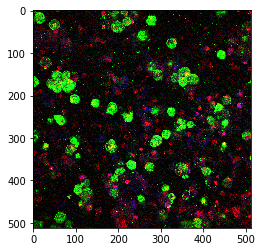

In [8]:
plt.imshow(cell_im)

*Step 5: Splitting our Channels for Thresholding*

Since we can threshold our three channel separately we will choose to do so for more effective thresholding.  The color channels are generated with different lasers and at different times within the same image processing session on a Nikon confocal microscope. So separate channel thresholding is a valid methodology!

In [9]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 6: A specific Import*

I am included this import here for teaching emphasis. Typically I would import it during Step 1.

This import will import all the functions for scikit images filters. Within these functions is a list of thresholds!  You can see the whole list at the following link: https://scikit-image.org/docs/stable/api/skimage.filters.html

In [11]:
import skimage.filters

*Types of Thresholds*

Sezgin et al 2004 split thresholds in six main types:

1. Histogram Shape
2. Clustering
3. Entropy
4. Object Attribute
5. Spatial
6. Local

Thresholds are just mathematical equations and applications that look at the pixels of images as signals with patterns and features that can be used to separate objects from the background or each other.

*Step 6: Scikit Image Thresholding Methods*

The threshoding methods available from Scikit Image are Histogram Based and Locally Based. So we are going to explore these two in our lesson today.

From your activity you should have just used the try_all_thresholds method from Sci-kit Image to try a bunch of thresholds at once (included here for reference)

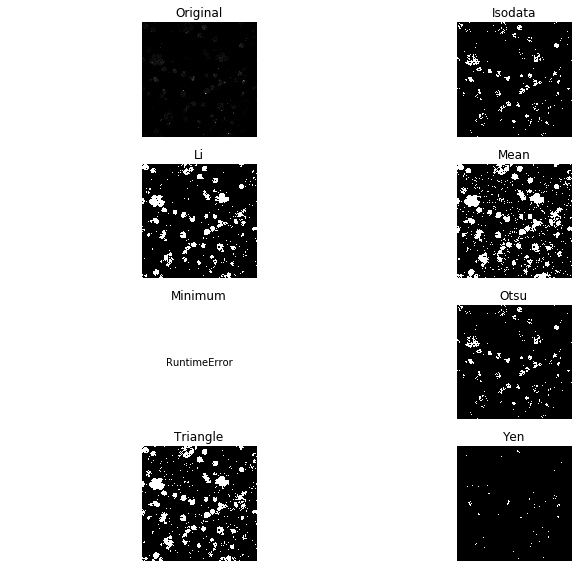

In [15]:
fig, ax = skimage.filters.try_all_threshold(green_cell_im, figsize=(10, 8), verbose=False)
plt.show()

*Step 7: Histogram Based Method*

In [27]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_min

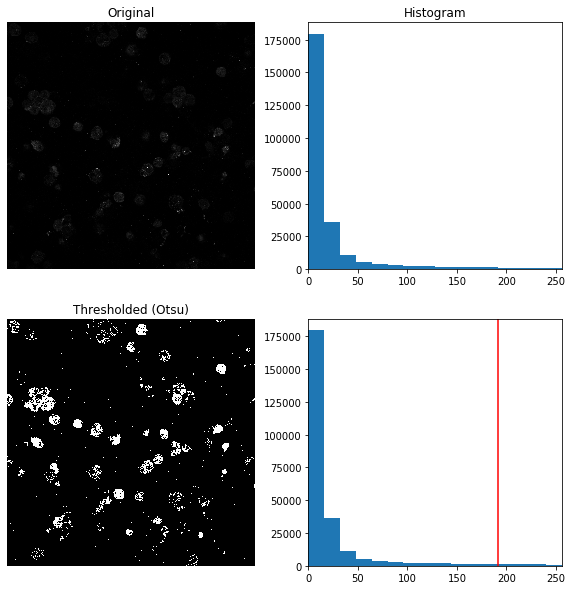

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0,1].set_xlim((0, 256)) 

ax[1, 0].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1,1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

Does anyone want to make a guess on why there is a large peak so close to 0 for our images?

__Next Week:__

Data Science: Functions, Files, Notebooks, Packages and Scripts

Image Processing: Segmenting, Labeling, and Basic Cell Morphology